# Medical Cost Personal Insurance Project



# Project Description


Health insurance is a type of insurance that covers medical expenses that arise due to an illness. 
These expenses could be related to hospitalisation costs, cost of medicines or doctor consultation fees. 
The main purpose of medical insurance is to receive the best medical care without any strain on your finances. 
Health insurance plans offer protection against high medical costs. It covers hospitalization expenses, day care procedures, 
domiciliary expenses, and ambulance charges, besides many others. Based on certain input features such as age , bmi,,
no of dependents ,smoker ,region  medical insurance is calculated .

In [ ]:
#importing the required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics


In [4]:
# reading the csv file
insurance_dataset=pd.read_csv('medical_cost_insurance.csv')

In [5]:
# printing the first 10 rows from the dataset
insurance_dataset.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [6]:
insurance_dataset.shape

(1338, 7)

In [7]:
insurance_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [8]:
# checking for null values in data set
insurance_dataset.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [9]:
insurance_dataset.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


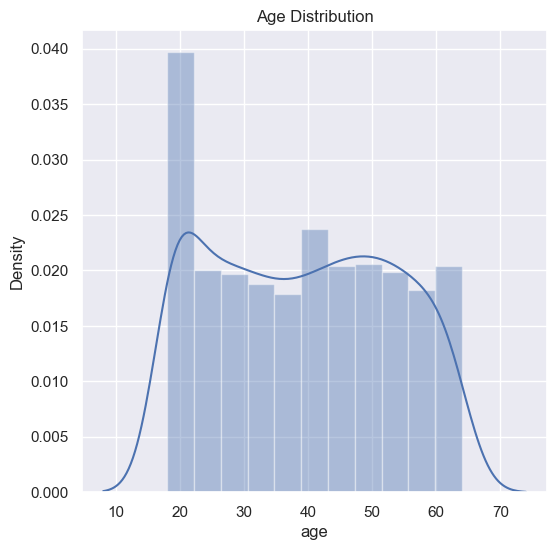

In [10]:
# Plotting the Age vs Density
sns.set()
plt.figure(figsize=(6,6))  # setting the size for the plotting
sns.distplot(insurance_dataset['age'])
plt.title('Age Distribution')
plt.show()

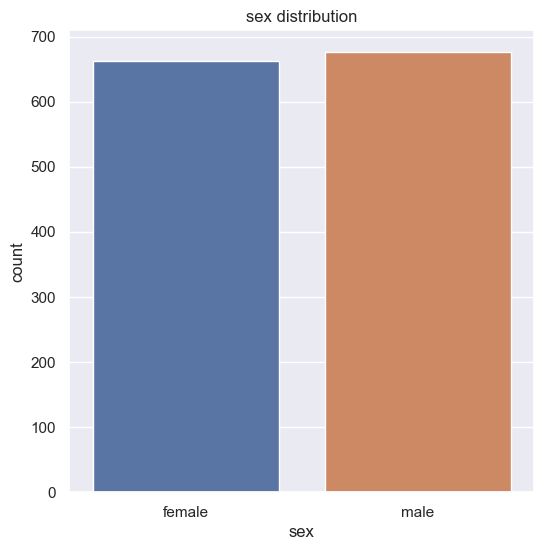

In [11]:
# Finding the distribution of Sex 
plt.figure(figsize=(6,6))
sns.countplot(x='sex',data=insurance_dataset)
plt.title('sex distribution')
plt.show()

In [12]:
# printing the count for male and female in dataset 
insurance_dataset['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


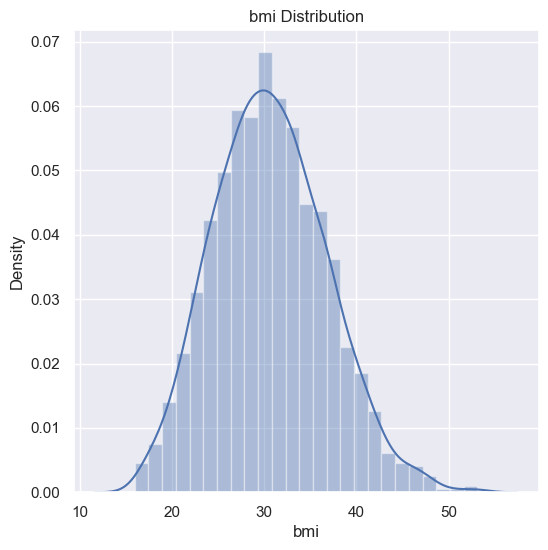

In [13]:
# plotting BMI vs Density
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(insurance_dataset['bmi'])
plt.title('bmi Distribution')
plt.show()

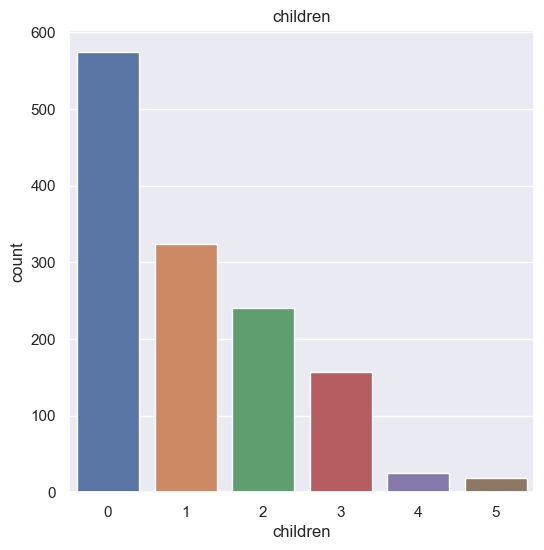

In [14]:
# plotting the graph to find the count of children
plt.figure(figsize=(6,6))
sns.countplot(x='children', data=insurance_dataset)
plt.title('children')
plt.show()

In [15]:
insurance_dataset['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

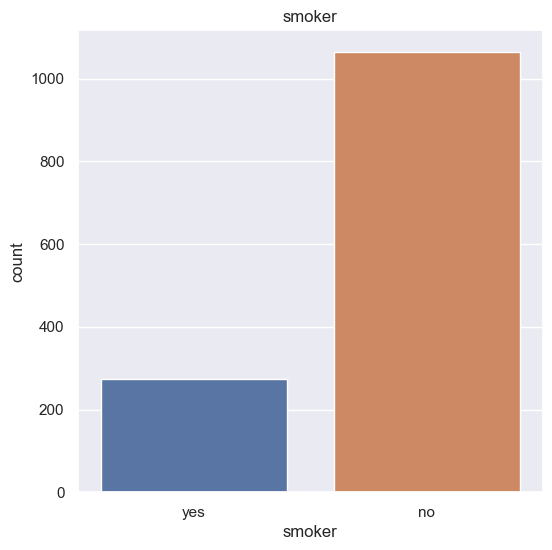

In [16]:
# plotting the graph for finding the number people smoking
plt.figure(figsize=(6,6))
sns.countplot(x='smoker', data=insurance_dataset)
plt.title('smoker')
plt.show()

In [17]:
insurance_dataset['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

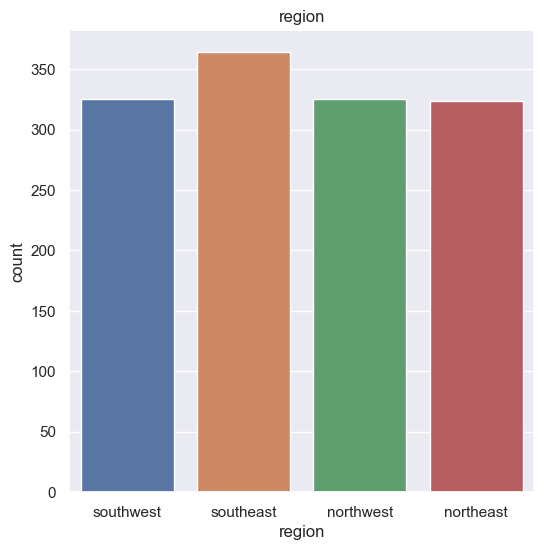

In [18]:
#plotting the graph of insurance region wise
plt.figure(figsize=(6,6))
sns.countplot(x='region', data=insurance_dataset)
plt.title('region')
plt.show()

In [19]:
insurance_dataset['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


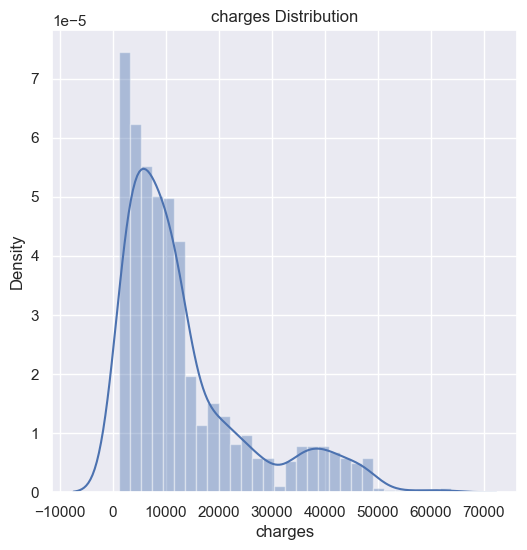

In [20]:
#plotting the curve for charges vs density 
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(insurance_dataset['charges'])
plt.title('charges Distribution')
plt.show()

In [83]:
#Replacing the values in the data set
insurance_dataset.replace({'sex':{'male':0 , 'female' :1}})
insurance_dataset.replace({'smoker':{'yes':0,'no':1}})
insurance_dataset.replace({'region':{'southeast':0,'southwest':1,'northeast':2,'northwest':3}})

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,0,1,16884.92400
1,18,0,33.770,1,1,0,1725.55230
2,28,0,33.000,3,1,0,4449.46200
3,33,0,22.705,0,1,3,21984.47061
4,32,0,28.880,0,1,3,3866.85520
...,...,...,...,...,...,...,...
1333,50,0,30.970,3,1,3,10600.54830
1334,18,1,31.920,0,1,2,2205.98080
1335,18,1,36.850,0,1,0,1629.83350
1336,21,1,25.800,0,1,1,2007.94500


In [84]:
x=insurance_dataset.drop(columns='charges',axis=1)
y=insurance_dataset['charges']

In [85]:
print(x)

      age  sex     bmi  children  smoker  region
0      19    1  27.900         0       0       1
1      18    0  33.770         1       1       0
2      28    0  33.000         3       1       0
3      33    0  22.705         0       1       3
4      32    0  28.880         0       1       3
...   ...  ...     ...       ...     ...     ...
1333   50    0  30.970         3       1       3
1334   18    1  31.920         0       1       2
1335   18    1  36.850         0       1       0
1336   21    1  25.800         0       1       1
1337   61    1  29.070         0       0       3

[1338 rows x 6 columns]


In [86]:
print(y)

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


In [87]:
# Prediting the data for trainging purpose
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.2,random_state=2)


In [88]:
print(x.shape,x_train.shape,x_test.shape)

(1338, 6) (1070, 6) (268, 6)


In [89]:
# applying linearRegression Algorithm 
regressor=LinearRegression()

In [90]:
regressor.fit(x_train,y_train)

LinearRegression()

In [91]:
training_data_prediction=regressor.predict(x_train)

In [92]:
r2_train=metrics.r2_score(y_train,training_data_prediction)
print('R squared value: ',r2_train)

R squared value:  0.751505643411174


In [93]:
test_data_prediction=regressor.predict(x_test)

In [94]:
r2_test=metrics.r2_score(y_test,test_data_prediction)
print('R squared value: ',r2_test)

R squared value:  0.7447273869684077


Building a predictive system

In [96]:
input_data=(52,1,30.78,1,1,2)

#changing input_data to numpy array
input_data_as_numpy_array=np.asarray(input_data)

#Reshape the array
input_data_reshaped=input_data_as_numpy_array.reshape(1,-1)

prediction=regressor.predict(input_data_reshaped)
print("Insurance cost in USD is: ",prediction[0])

Insurance cost in USD is:  11710.765087870992


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
